# Trabalho computacional 1
## Questão 1.
### Itens A, B e C

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

Os dados serão carregados em um Dataframe df:

In [2]:
df=pd.read_csv('forbes.csv',header=0,index_col=0)
df.columns=['BoilingPoint','Pressure']
print(df)

    BoilingPoint  Pressure
1          194.5     20.79
2          194.3     20.79
3          197.9     22.40
4          198.4     22.67
5          199.4     23.15
6          199.9     23.35
7          200.9     23.89
8          201.1     23.99
9          201.4     24.02
10         201.3     24.01
11         203.6     25.14
12         204.6     26.57
13         209.5     28.49
14         208.6     27.76
15         210.7     29.04
16         211.9     29.88
17         212.2     30.06


Como o objetivo do estudo de James D. Forbes era estimar a altitude ao medir o ponto de ebulição da água, teremos que o modelo procurado será: pres=f(bp), ou seja, o modelo procura inferir a pressão a partir da temperatura de ebulição.

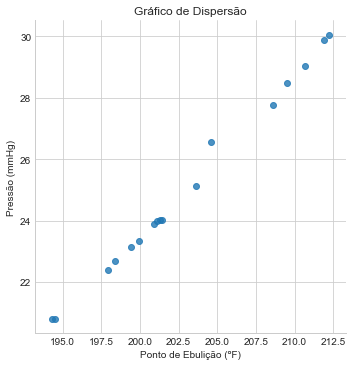

In [3]:
sns.set_style(style='whitegrid')
sns.lmplot(x='BoilingPoint',y='Pressure',data=df,fit_reg=False)
plt.xlabel('Ponto de Ebulição (ºF)')
plt.ylabel('Pressão (mmHg)')
plt.title('Gráfico de Dispersão')
plt.show()

Pelo gráfico acima podemos notar que a relação entre os dados se aproxima de uma reta, logo o modelo de regressão linear é uma boa aproximação, como evidenciado abaixo

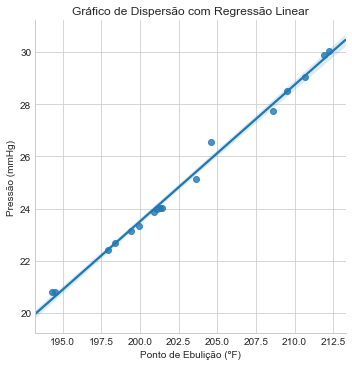

In [4]:
sns.lmplot(x='BoilingPoint',y='Pressure',data=df)
plt.xlabel('Ponto de Ebulição (ºF)')
plt.ylabel('Pressão (mmHg)')
plt.title('Gráfico de Dispersão com Regressão Linear')
plt.show()

Utilizaremos a função linregress() do modulo *stats* da biblioteca *scipy* para calcular os parametros e estatisticas do modelo de regressão linear.   

Slope: Inclinação da reta;  
Intercept: Coeficiente linear ou ponto de intersecção com o eixo *y*;  
R-Value: Coeficiente de correlação;  
P-value: P-valor ou probabilidae de significância;  
StdErr: Erro padrão.

In [5]:
slope, intercept, rvalue, pvalue, stderr=stats.linregress(x=df.BoilingPoint,y=df.Pressure)
print('A='+str(slope)+' e B='+str(intercept))

A=0.522892400785 e B=-81.0637271287


Temos então como modelo y=ax+b, a=0,52289 e b=-81,0637

In [6]:
R2=rvalue**2
print('Temos R2='+  str(R2))

Temos R2=0.994428152646


Com os valores de a e b podemos calcular a saída medida pelo modelo e calcular os resíduos:

In [7]:
Ypred=df.BoilingPoint*slope + intercept
resid=df.Pressure-Ypred
print(resid)

1     0.151155
2     0.255734
3    -0.016679
4    -0.008125
5    -0.051018
6    -0.112464
7    -0.095356
8    -0.099935
9    -0.226802
10   -0.184513
11   -0.257166
12    0.649942
13    0.007769
14   -0.251628
15   -0.069702
16    0.142827
17    0.165960
dtype: float64


Podemos visualizar os resíduos utilizado *residplot*:

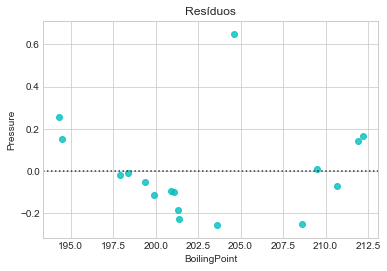

In [8]:
sns.residplot(x='BoilingPoint',y='Pressure',data=df,color='c')
plt.title('Resíduos')
plt.show()

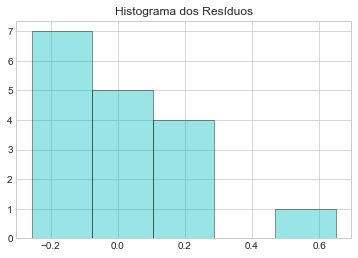

In [9]:
sns.distplot(resid,kde=False,hist_kws={'edgecolor':'k'},color='c')
plt.title('Histograma dos Resíduos')
plt.show()

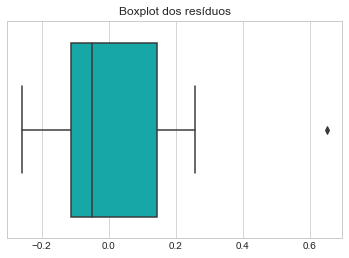

In [10]:
box=sns.boxplot(resid,color='c')
plt.title('Boxplot dos resíduos')
plt.show()

A partir do Boxplot acima podemos notar que existe um outlier, 0,65 aproximadamente, mas que o modelo linear é apropriado, pois a amplitude dos residuos retirando este outlier fica entre -0,25 e 0,25.  

Apesar de existir um outlier olhando para a distribuição dos residuos, podemos notar, analisando o gráfico de dispersão com a linha de regressão, que não existe uma amostra discrepante em relação as outras, então não temos razão para retirar este outlier do modelo. 

Para calcular a variância do resíduo podemos utilizar o método *var* de um DataFrame, ele nos dá a a variância com *Delta( Graus de liberdade ) = 1* por padrão, deste modo teremos no denominador da fórmula da variância o valor *(N-1)*, como é desejado neste caso.

In [11]:
print(resid.var()) # (N-1)

0.050821438352653604


In [12]:
squaredresid=resid**2
residvar=np.sum(squaredresid.values)/(len(squaredresid)-1)
print(residvar)

0.0508214383527


## Questão 1
### Item d

Repetindo todo o processo para a função log(P) = a*BP + b, onde P é a pressão e BP é o ponto de ebulição.

In [13]:
dflog=df.copy()
dflog.Pressure=np.log10(df.Pressure)
dflog.columns=['BoilingPoint','LogPressure']
print(dflog)

    BoilingPoint  LogPressure
1          194.5     1.317854
2          194.3     1.317854
3          197.9     1.350248
4          198.4     1.355452
5          199.4     1.364551
6          199.9     1.368287
7          200.9     1.378216
8          201.1     1.380030
9          201.4     1.380573
10         201.3     1.380392
11         203.6     1.400365
12         204.6     1.424392
13         209.5     1.454692
14         208.6     1.443419
15         210.7     1.462997
16         211.9     1.475381
17         212.2     1.477989


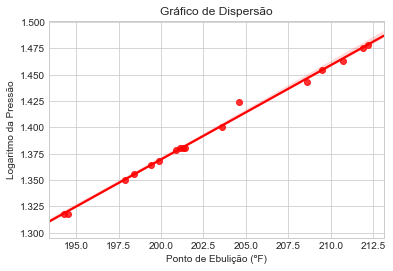

In [14]:
sns.regplot(x='BoilingPoint',y='LogPressure',data=dflog,color='r')
plt.xlabel('Ponto de Ebulição (ºF)')
plt.ylabel('Logaritmo da Pressão')
plt.title('Gráfico de Dispersão')
plt.show()

Em seguida calculamos os parametros e estatisticas do modelo de regressão linear, estamos interessados em A,B e R-quadrado.

In [15]:
slope, intercept, rvalue, pvalue, stderr=stats.linregress(x=dflog.BoilingPoint,y=dflog.LogPressure)
print('A='+str(slope)+' e B='+str(intercept))
print('R-squared:'+str(rvalue))

A=0.00895617764651 e B=-0.421641837504
R-squared:0.997477119616


O valor de R-squared aumentou um pouco comparado com o modelo anterior que possuia R-squared de 0.994428152646

Em seguida calculamos os resíduos e avaliamos sua distribuição através do histograma, boxplot e residplot.

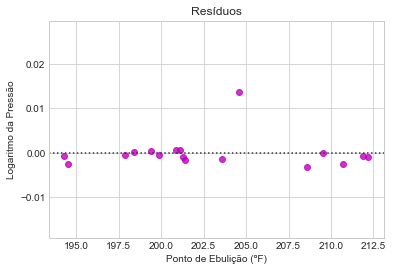

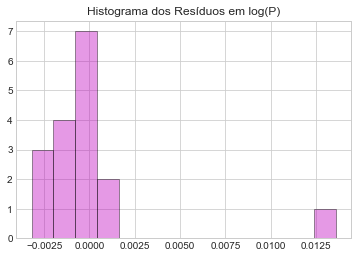

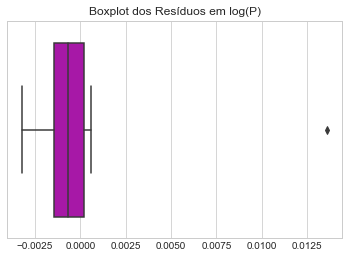

In [16]:
Ypred2=dflog.BoilingPoint*slope + intercept
resid2=dflog.LogPressure-Ypred2
sns.residplot(x='BoilingPoint',y='LogPressure',data=dflog,color='m')
plt.xlabel('Ponto de Ebulição (ºF)')
plt.ylabel('Logaritmo da Pressão')
plt.title('Resíduos')
plt.show()
sns.distplot(resid2,kde=False,color='m',hist_kws={'edgecolor':'k'})
plt.title('Histograma dos Resíduos em log(P)')
plt.show()
sns.boxplot(resid2,color='m')
plt.title('Boxplot dos Resíduos em log(P)')
plt.show()

Dos gráficos acima é possível notar que a distribuição dos resíduos se tornou mais concentrada (amplitude menor), demonstrando que o modelo que avalia a dependência do logaritmo da pressão é ainda melhor que o modelo anterior. 
É possível notar também que o outlier se mantém mesmo nesta analise, apesar disso não retiraremos este outlier dos dados, pois olhando para o gráfico de dispersão não existe razão para faze-lo.

Em seguida calcularemos a variância do resíduo:

In [17]:
print(resid2.var())

1.3477659480347859e-05


Obtemos então uma variância do resíduo de 1.3477659480347859e-05, muito menor que o valor de 0.0508214383527 encontrado no modelo anterior.